<a href="https://colab.research.google.com/github/allen-del/Learning_PyTorch/blob/main/03.%20Computer%20Vision%20/03CV_multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-classification using Computer Vision

Some cool applications of CV are:

* Classification (Binary and Multiclass)
* Object detection
* Segmentation


## Computer Vision libraries

* `torchvision` - base domain library
  * `torchvision.datasets` - get datasets and data loading functions
  * `torchvison.models` - get pretrained CV models with weights and biases
  * `torchvisions.transforms` - functions for manipulating Images
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.Dataloader` - creates Python iterable over a dataset




In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import models
from torchvision.transforms import ToTensor
from torchvision.transforms import v2


import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.3.0+cu121', '0.18.0+cu121')

## 1. Getting Dataset

We'll use FashionMNIST from `torchvision.datasets`

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]), # images come as PIL format, we want to turn into Torch tensors. ToTensor() is deprecated
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
)

100%|██████████| 26421880/26421880 [00:03<00:00, 7459168.06it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 127751.74it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 550505.03it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 2655549.99it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]

image

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [5]:
image.shape #In the format[color_channels, height, width] with only one color_channel because our dataset has only grayscale images (black and white)

torch.Size([1, 28, 28])

An Image can be represented as a tensor with values for color_channels **C**, height **H**, width **W** and batch_size **N**

_Note: PyTorch uses the format **NCHW** but other libraries may put color_channels last ie, **NHWC**_

In [6]:
label

9

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx_labels = train_data.class_to_idx
class_to_idx_labels

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

*There are many more attributes that are part of the data*

###Visualizing images

Image shape: torch.Size([1, 28, 28]) 



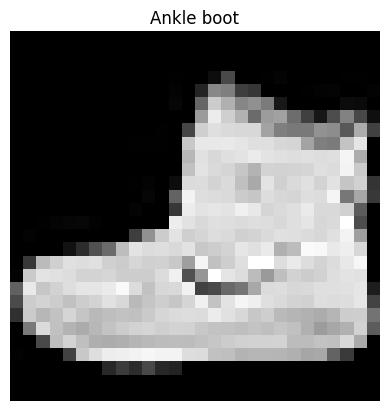

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape} \n")
#plt.imshow(image) Error because matplotlib requires color_channels last
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

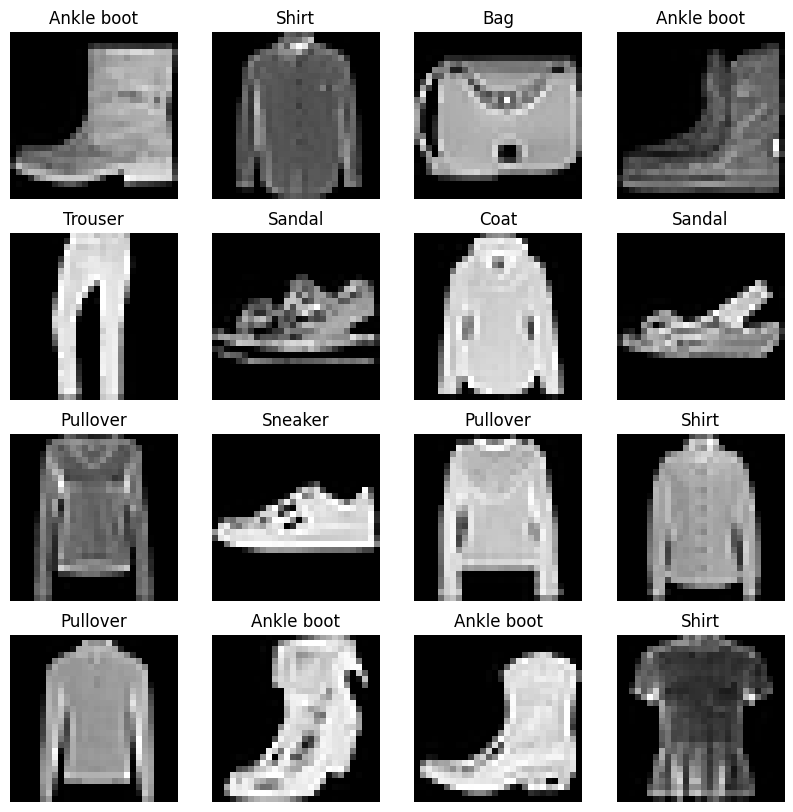

In [10]:
#Plot more images

torch.manual_seed(42)

fig = plt.figure(figsize = (10, 10))
rows, cols = 4, 4
for i in range(1, rows*cols+1): #plt.add_subplot() has first index as 1 not 0
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False);


##Prepare DataLoader

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
            ),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                  ToImage()
                  ToDtype(scale=True)
            ))

Our Data is now in the form of **PyTorch datasets**.
DataLoader turns it into a **Python iterable**.

**Why Batches?**

* Because processing all the data at once is very resource intensive.
* More computationally efficient.
* It also gives our neural network more chances to update its gradients per epoch.
  [*(Read more about Mini batch GD)*](https://www.youtube.com/watch?v=-_4Zi8fCZO4)



In [12]:
from torch.utils.data import DataLoader

#Setup batch size hyperparameter

BATCH_SIZE = 32


# Turn datasets into iterables (batches)


train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE, #How many images are we training on at one go (Don't confuse with epoch)
                              shuffle = True) #Shuffle so the model doesn't learn the order of the dataset



test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False) #Usually don't shuffle test dataset because it's easier to evaluate for us.



In [13]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78068902fb20>,
 <torch.utils.data.dataloader.DataLoader at 0x78068902ff40>)

In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

Our model will look at `1875` batches of `32` samples instead of `1` batch of `60000`

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
len(train_features_batch)

32

Note: `next()` returns one entire batch from the dataloader. When run again it moves to the next batch.

`train_dataloader` is a Python iterable. First turn that into an [iterator](https://stackoverflow.com/questions/9884132/what-are-iterator-iterable-and-iteration) using `iter()`, then we can iterate over it and get samples.
[Read more](https://stackoverflow.com/questions/62549990/what-does-next-and-iter-do-in-pytorchs-dataloader)

(-0.5, 27.5, 27.5, -0.5)

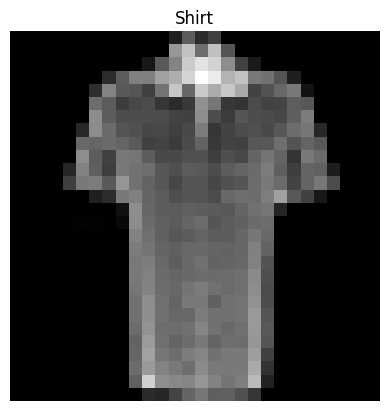

In [17]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

##Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

Start simple and add complexity when necessary

In [18]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [19]:
output = flatten_model(x)

output.shape

torch.Size([1, 784])

We add `Flatten()` because it compresses out input image into a singular vector.

What happens if we don't flatten?

We get an output of shape `[1, 28, 28, 10]` instead of `[1,10]` (one logit per class)

In [20]:
from torch import nn
class FMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

model_0 = FMNISTModelV0(
          input_shape = 1*28*28,
          output_shape = len(class_names),
          hidden_units = 10
          )
model_0

FMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

###Set up Loss fn, Optimizer and Evaluation Metric

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else :
  print("Downloading helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn


In [23]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


###Creating a function to time our experiments

In [24]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = None):

  total_time = end - start
  print(f"\n ******************* \nTrain time on {device}: {total_time: .3f} seconds")
  return total_time

##Train and test loop (on batches of data)

*Steps are a bit different compared to what we learnt previously*

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate train loss     *__per batch__*
3. Loop through testing batches, perform testing steps, calculate test loss      *__per batch__*
4. Time it out

In [25]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

train_start_on_cpu = timer()

epochs = 3 #Set it to small for faster training



for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n")
  net_train_loss = 0

  #Training Loop
  for batch, (X_train,y_train) in enumerate(train_dataloader):

    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    net_train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} samples")

  #Divide total train_loss by length of train_dataloader to get average train loss per epoch
  avg_train_loss = net_train_loss / len(train_dataloader)

  #Testing Loop

  model_0.eval()
  with torch.inference_mode():
    net_test_loss, net_test_acc = 0, 0
    for X_test, y_test in test_dataloader:

      test_pred = model_0(X_test)

      net_test_loss+=loss_fn(test_pred, y_test)
      net_test_acc += accuracy_fn(test_pred.argmax(dim = 1), y_test)


  #Test loss average per batch
  avg_test_loss = net_test_loss / len(test_dataloader)
  #Test Accuracy average per batch
  avg_test_acc = net_test_acc / len(test_dataloader)


  print(f"{epoch} Epochs || Train Loss: {avg_train_loss: .4f} | Test Loss: {avg_test_loss: .4f} , Test Accuracy: {avg_test_acc: .3f}")


train_end_on_cpu = timer()
total_train_time_mode_0 = print_train_time(start = train_start_on_cpu,
                                            end = train_end_on_cpu,
                                            device = str(next(model_0.parameters()).device)
                                            )



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
0 Epochs || Train Loss:  0.5904 | Test Loss:  0.5095 , Test Accuracy:  82.039
Epoch: 1 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
1 Epochs || Train Loss:  0.4763 | Test Loss:  0.4799 , Test Accuracy:  83.197
Epoch: 2 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
2 Epochs || Train Loss:  0.4550 | Test Loss:  0.4766 , Test Accuracy:  83.427

 ******************* 
Train time on cpu:  53.589 seconds


*__Note__: Loss, Accuracy and y_pred kept turning into NaN values (Took two hours to finally figure it out -_-)*

**Why'd it happen?**

While setting up the dataset, in `transform = v2.Compose([v2.ToImage(),v2.ToDtype(dtype = torch.float32)])`


Did not setting `scale = True`

*(Tensor images with a float dtype are expected to have values in [0, 1] and setting `scale` scales the data to the range)*

In [26]:
#Understanding the training loop.

for A in enumerate(train_dataloader):
 print(f"Batch number : {A[0]}")
 print(f" X_batch {A[1][0].shape}")
 print(f" y_batch {A[1][1].shape}")

 break

#read more https://www.geeksforgeeks.org/enumerate-in-python/

Batch number : 0
 X_batch torch.Size([32, 1, 28, 28])
 y_batch torch.Size([32])


In [27]:
#Understanding testing loop
model_0.eval()
with torch.inference_mode():
  for X_test, y_test in test_dataloader:

    print(X_test.shape)
    print(y_test.shape)

    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


One Single sample has the shape `[1, 28, 28]`. There are `32` samples in a batch. The shape of input is now `[32, 1, 28, 28]`

In the Forward pass, we've given inputs batch by batch and updated the gradients **batch by batch** as well.

The loss is calculated and propogated backwards **batch by batch**.

For our reference we have calculated average loss over a single epoch.



###Make predictions and get model_0 results

Nothing too complicated. Just functionizing the evaluation to store a dictionary of corresponing `model_name`, `loss`, and `accuracy`

In [28]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn):

  """ Returns a dictionary containing results of model predicting on data_loader"""

  loss, acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #X, y = X.to(device), y.to(device)
      y_pred = model(X)

      #Accumulate loss and accuracy over all batches
      loss+=loss_fn(y_pred, y)
      acc+=acc_fn(y_true=y,
                  y_pred=y_pred.argmax(dim=1))

    #Scale loss and acc to find avg per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__, #only works when model was created using a class
        "model_loss": loss.item(), #turn it into a single value using .item(),
        "model_acc": acc}



In [29]:
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             acc_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FMNISTModelV0',
 'model_loss': 0.4766390323638916,
 'model_acc': 83.42651757188499}

##Set up device agnostic code


In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##Build a model with non-linearity

Add some non-linear functions in between our linear layers

In [31]:
class FMNISTV1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)


In [32]:
torch.manual_seed(42)

model_1 = FMNISTV1(input_shape=1*28*28,
                   hidden_units=10,
                   output_shape=10)

model_1.to(device)

model_1

FMNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

##Train the new model

###Functionizing Training and Testing Loops

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """ Trains a model by learning on data_loader"""


  model.train()

  from tqdm.auto import tqdm

  train_loss, train_acc = 0, 0

  #Train Loop through all batches

  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    train_acc +=  accuracy_fn(y_true = y, y_pred = y_logits.argmax(dim = 1))
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} samples")

  #Divide total train_loss and accuracy by length of train_dataloader to get average train loss per epoch
  train_loss = train_loss / len(data_loader)
  train_acc = train_acc /  len(data_loader)
  print(f"\nTrain Loss:{train_loss: .4f}, Train Acc{train_acc: .2f}")



In [35]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):

  """Evaluates the model by testing on data_loader"""

  from tqdm.auto import tqdm

  model.eval()

  #Model in evaluation mode for predictions

  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)
      model.to(device)

      y_logits = model(X)

      test_loss = test_loss + loss_fn(y_logits, y)

      test_acc = test_acc + accuracy_fn(y, y_logits.argmax(dim = 1))

  #Calculate and print average loss and accuracy over all batches

  test_loss = test_loss / len(data_loader)
  test_acc = test_acc / len(data_loader)

  print(f"Test loss{test_loss: .4f}, Test Acc{test_acc: .2f}\n")



In [36]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):

  print(f"________{epoch} Epochs ________ ")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device
             )

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            optimizer=optimizer,
            accuracy_fn = accuracy_fn,
            device = device
            )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,
                                              train_time_end_on_gpu,
                                              device)



  0%|          | 0/3 [00:00<?, ?it/s]

________0 Epochs ________ 
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 1.0920, Train Acc 61.34
Test loss 0.9564, Test Acc 65.00

________1 Epochs ________ 
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.7810, Train Acc 71.93
Test loss 0.7223, Test Acc 73.91

________2 Epochs ________ 
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.6703, Train Acc 75.94
Test loss 0.6850, Test Acc 75.02


 ******************* 
Train time on cpu:  69.861 seconds


In [37]:
model_0_results

{'model_name': 'FMNISTModelV0',
 'model_loss': 0.4766390323638916,
 'model_acc': 83.42651757188499}

In [38]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             acc_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [39]:
model_1_results

{'model_name': 'FMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

##Convolutional Neural Network (CNN)

A simple example would be:

Input layer -> _Convolutional layer -> activation layer -> pooling layer_ -> Output (Classifier) layer

*Convolutional blocks (aka Feature extractors) in Hidden layers can be rearranged or repeated as per requirement*

* Conv Layer - A small part of the input tensor *__dot product__*    
 convolution kernel/filter.

 The convolution operation consists of placing the kernel over a portion of the input and multiplying the elements of the filter with the corresponding elements of the input.
 Then you slide the fliter and repeat.

 * Filter has a set of weights and is used to learn specific features in the input image.

[Read More](https://www.ibm.com/topics/convolutional-neural-networks)
[1](https://poloclub.github.io/cnn-explainer/)

###Building a model

In [40]:
class FMNISTV2(nn.Module):

  """Model architecture replicating TinyVGG"""

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features = output_shape)
    )


  def forward(self, x):
    x = self.conv_block1(x)
    #print(f"After Conv block 1: {x.shape}")
    x = self.conv_block2(x)
    #print(f"After Conv block 2: {x.shape}")
    x = self.classifier_layer(x)
    #print(f"After Classifier Layer {x.shape}")
    return x


In [41]:
torch.manual_seed(42)
model_2 = FMNISTV2(input_shape = 1,
                   hidden_units=10,
                   output_shape = len(class_names)
                   ).to(device)
model_2


FMNISTV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Notice how input to the model is `1`, corresponding to `color_channels` and not the pixels of image like in V0 and V1. If we were using RGB and not grayscale images in our dataset, the input would be `3`.

Our input is one image to the `Conv block` which learns the features and sends it to `Classifier layer` giving us class probs as outputs.

###Understanding Conv block

#### Stepping through nnConv2d



In [42]:
torch.manual_seed(42)

images = torch.randn(size =(32, 3, 64, 64))
test_image = images[0]

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding = 0
                       )

conv_output = conv_layer(test_image)
test_image.shape, conv_output.shape


(torch.Size([3, 64, 64]), torch.Size([10, 62, 62]))

#### Stepping through nnMaxPool2d

In [43]:
maxpool_layer = nn.MaxPool2d(kernel_size = 2)
maxpool_output = maxpool_layer(test_image)
test_image.shape, maxpool_output.shape,

maxpool_out = maxpool_layer(conv_output)

In [44]:
print(f"{test_image.shape} --> {conv_output.shape} --> {maxpool_out.shape}")

torch.Size([3, 64, 64]) --> torch.Size([10, 62, 62]) --> torch.Size([10, 31, 31])


In [45]:
torch.manual_seed(42)

random_tensor = torch.randn(size = (1,1,2,2))
random_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [46]:
maxpool_tensor = maxpool_layer(random_tensor)
maxpool_tensor

tensor([[[[0.3367]]]])

In [47]:
print(f"{random_tensor.shape} --> {maxpool_tensor.shape} \n\n\n")
print(f"{random_tensor} --> {maxpool_tensor}")

torch.Size([1, 1, 2, 2]) --> torch.Size([1, 1, 1, 1]) 



tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) --> tensor([[[[0.3367]]]])


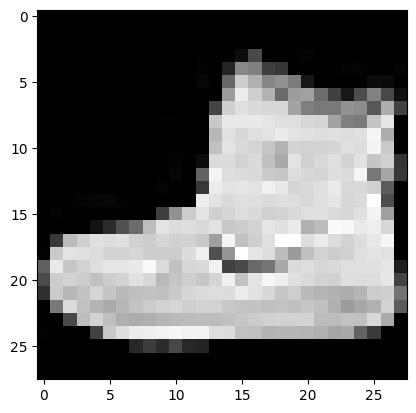

In [48]:
plt.imshow(image.squeeze(),cmap="gray")

In [49]:
pred = model_2(image.unsqueeze(0).to(device))
class_names[pred.argmax(dim = 1)]

'Pullover'

###Set up Loss Fn and Optimizer

In [50]:
from helper_functions import accuracy_fn as acc_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.1)

###Train Model

In [51]:
epochs = 3

from timeit import default_timer as timer

start_timer_on_gpu = timer()

from tqdm.auto import tqdm

for epoch in tqdm(range(epochs)):

  print(f"________{epoch} Epochs ________")

  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = acc_fn,
             device = device)

  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            optimizer = optimizer,
            accuracy_fn = acc_fn,
            device = device)

end_timer_on_gpu = timer()

total_train_time_model_2 = print_train_time(start_timer_on_gpu, end_timer_on_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

________0 Epochs ________
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.5797, Train Acc 79.00
Test loss 0.4283, Test Acc 84.34

________1 Epochs ________
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.3521, Train Acc 87.25
Test loss 0.3379, Test Acc 87.93

________2 Epochs ________
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.3147, Train Acc 88.67
Test loss 0.3201, Test Acc 88.41


 ******************* 
Train time on cpu:  261.491 seconds


###Evaluate Model

In [52]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    acc_fn = acc_fn,
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FMNISTV2',
 'model_loss': 0.32013776898384094,
 'model_acc': 88.40854632587859}

##Compare model results and training time

In [53]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FMNISTModelV0,0.476639,83.426518
1,FMNISTV1,0.685001,75.019968
2,FMNISTV2,0.320138,88.408546


In [54]:
#Add training time to comparison

compare_results["training_time"] = [total_train_time_mode_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FMNISTModelV0,0.476639,83.426518,53.588592
1,FMNISTV1,0.685001,75.019968,69.860871
2,FMNISTV2,0.320138,88.408546,261.491235


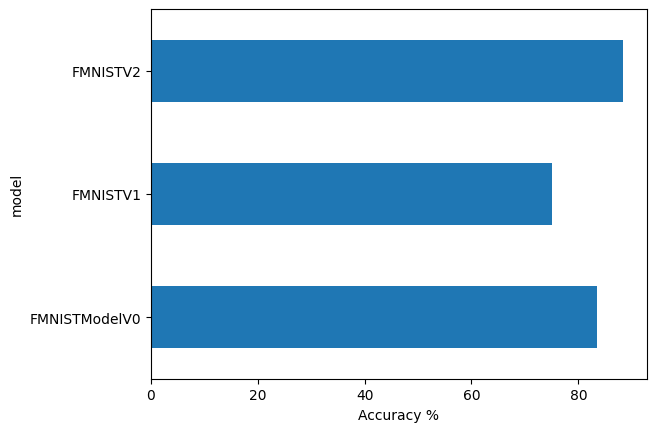

In [55]:
#Visualize out results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel("model");

### Evaluate random predictions with our best model

In [56]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  """ Using from dataset, visualize, and perform predictions """
  model.to(device)
  pred_probs = []
  model.eval()
  with torch.inference_mode():

    for sample in data:

      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = pred_logit.squeeze().softmax(dim = 0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [57]:
import random
random.seed(420)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

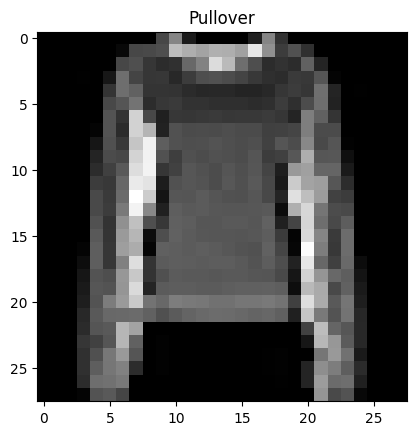

In [58]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]]);

In [59]:
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

pred_probs[:2]

tensor([[9.5514e-04, 2.4560e-04, 9.2599e-01, 1.0540e-04, 1.6522e-02, 4.0632e-05,
         5.6009e-02, 1.4215e-07, 9.2794e-05, 3.8196e-05],
        [1.9109e-03, 4.7692e-04, 1.1796e-03, 2.2900e-01, 7.5732e-01, 2.2094e-06,
         3.9493e-03, 1.2494e-04, 6.0122e-03, 2.3384e-05]])

In [60]:
#Convert prediction probs to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes, test_labels

(tensor([2, 4, 5, 5, 8, 5, 9, 0, 3]), [2, 3, 5, 5, 8, 5, 9, 0, 3])

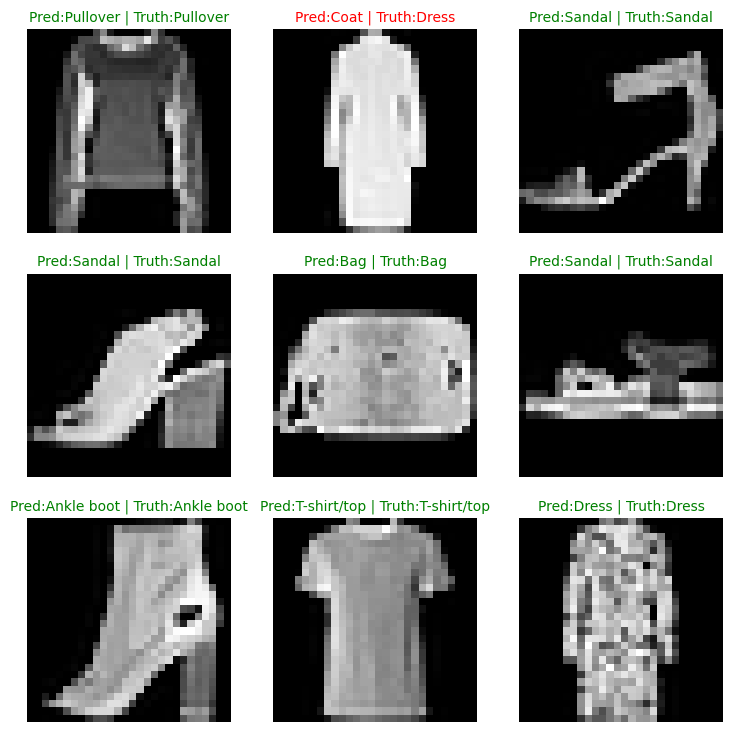

In [61]:
#Plot predictions

plt.figure(figsize=(9,9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title = f"Pred:{pred_label} | Truth:{truth_label}"

  if pred_label == truth_label:
    plt.title(title, fontsize=10, c="g")
  else:
    plt.title(title, fontsize=10, c="r")

  plt.axis(False);

###Making a Confusion Matrix

Compares predictions and truth labels.

Steps:

1. Make predictions on test_dataset
2. Make confusion matrix using `torchmetrics MulticlassConfusionMatrix`
3.Plot confusion marix using `mlextnd.plotting.plot_confusion_matrix()`

In [63]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [66]:
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())



Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 2])

In [75]:
len(y_preds), y_preds[0].shape

(313, torch.Size([32]))

In [77]:
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.shape

torch.Size([10000])

In [85]:
import mlxtend
import torchmetrics
from torchmetrics.classification import MulticlassConfusionMatrix
torchmetrics.__version__, mlxtend.__version__

('1.4.0.post0', '0.22.0')

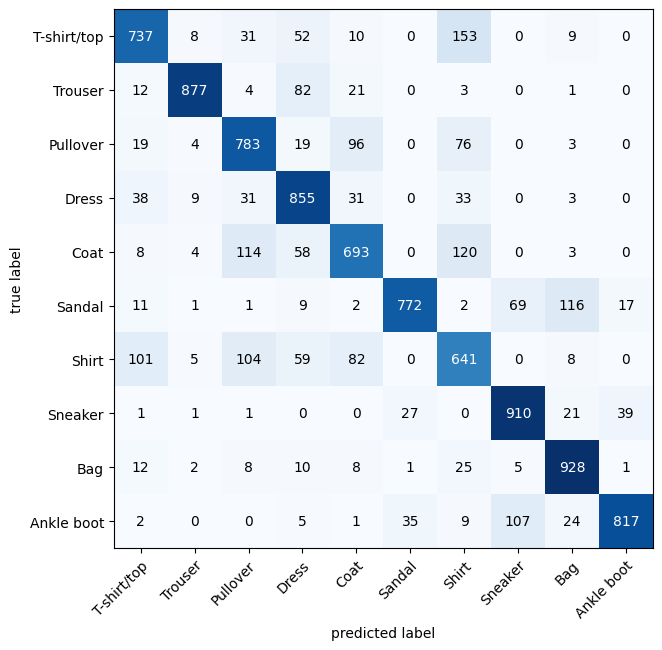

In [88]:
from mlxtend.plotting import plot_confusion_matrix

#Setup confusion instance and compare preds to targets

confmat = MulticlassConfusionMatrix(num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize=(10,7))
